# Chapter 1: Importing flat files

Hi! Welcome to a draft Chapter. This is really intended to document the code that I would like all students to be able to write after completing the Chapter in question. Below, I briefly describe a Video Exercise, then provide the code that will be in the Interactive Exercises following that Video Exercise, along with a short description of what the code does. I will always state something like 'Plan: make 4 or 5 exercises from the code below.' In quite a few cases, there is too much code. I welcome feedback on which bits of code I can throw out, among many other things, such as structure, conceptual flow and best coding practices (I do not follow all PEP8 guidelines here; I will, of course). Be critical!

### Video Exercise 1

Introduction, summary of flat file types & how to import .txt using basic Python commands.

### Interactive Exercises:

Plan: make 4 or 5 exercises from the code below.
___

### Opening entire files

In [1]:
#Open a file
file = open('datasets/arrivaltext.csv' , 'r') #'r' is to read only.
#Print it
print(file.read())
#close file
file.close()

Airline,Mar,June,Aug
8,84.4,69.4,85
7,80.3,77,80.4
6,80.8,75.1,81
2,72.7,65.1,78.3
5,78.7,72.2,77.7
4,79.3,68.4,75.1
9,78.6,69.2,71.6
10,73.6,68.9,70.1
1,71.9,75.4,64.4
3,76.5,70.3,62.5



### Opening a file line by line

In [2]:
#Open a file
file = open('datasets/arrivaltext.csv')
#print one line
print(file.readline())
#print another line
print(file.readline())
#is file closed?
print(file.closed)
#close file
file.close()
#is file closed now?
print(file.closed)

Airline,Mar,June,Aug

8,84.4,69.4,85

False
True


Do the above without having to explicitly close the file:

In [3]:
#Avoid having to explicitly close:
#This has the advantage that the file 
#is properly closed after its suite finishes, even if an exception is raised on the way
with open('datasets/arrivaltext.csv') as file:
    print(file.readline())

Airline,Mar,June,Aug



Importing & reading a .csv so that each line is a list:

In [6]:
#Importing a .csv#
###################
#Import package:
import csv
#open file
with open('datasets/arrivaltext.csv') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)
#close file
file.close()
#http://stackoverflow.com/questions/8009882/how-to-read-large-file-line-by-line-in-python
#https://docs.python.org/2/tutorial/inputoutput.html

['Airline', 'Mar', 'June', 'Aug']
['8', '84.4', '69.4', '85']
['7', '80.3', '77', '80.4']
['6', '80.8', '75.1', '81']
['2', '72.7', '65.1', '78.3']
['5', '78.7', '72.2', '77.7']
['4', '79.3', '68.4', '75.1']
['9', '78.6', '69.2', '71.6']
['10', '73.6', '68.9', '70.1']
['1', '71.9', '75.4', '64.4']
['3', '76.5', '70.3', '62.5']


Printing only some of the rows:

In [6]:
####what if you only want some of the rows?###
##############################################
import csv
#the rows that you want:
I = [0,1,3,9]
with open('datasets/arrivaltext.csv') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        if i in I:
            print(row)
#http://stackoverflow.com/questions/8009882/how-to-read-large-file-line-by-line-in-python
#https://docs.python.org/2/tutorial/inputoutput.html

['Airline', 'Mar', 'June', 'Aug']
['8', '84.4', '69.4', '85']
['6', '80.8', '75.1', '81']
['1', '71.9', '75.4', '64.4']


If we want consecutive rows, we can do much better performance-wise using itertools (explain):

In [7]:
###if we want consecutive rows, we can do better performance-wise using itertools (explain, please)###
import itertools
i, j = 2,4
with open('datasets/arrivaltext.csv') as file:
    reader = csv.reader(file, delimiter=',')
    for row in itertools.islice(reader, i, j+1):
        print(row)

['7', '80.3', '77', '80.4']
['6', '80.8', '75.1', '81']
['2', '72.7', '65.1', '78.3']


What if we want only a subset of columns?

In [8]:
#importing a .csv & printing certain columns
import csv
with open('datasets/arrivaltext.csv') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row[2:4])

['June', 'Aug']
['69.4', '85']
['77', '80.4']
['75.1', '81']
['65.1', '78.3']
['72.2', '77.7']
['68.4', '75.1']
['69.2', '71.6']
['68.9', '70.1']
['75.4', '64.4']
['70.3', '62.5']


We can also print the intersection of rows & columns:

In [9]:
#importing a .csv & printing certain columns
import csv
I = [1,3]
with open('datasets/arrivaltext.csv') as file:
    reader = csv.reader(file)
    for row in reader:
        print([row[i] for i in I])

['Mar', 'Aug']
['84.4', '85']
['80.3', '80.4']
['80.8', '81']
['72.7', '78.3']
['78.7', '77.7']
['79.3', '75.1']
['78.6', '71.6']
['73.6', '70.1']
['71.9', '64.4']
['76.5', '62.5']


### Video Exercise 2

Variations on the above reading data into Python: we can do all of the above with .txt files; we can read the files into dictionaries; we can store the data we read in as lists; we can convert the data to numpy arrays (matrices).

### Interactive Exercises:

Plan: turn the following code into 3 or 4 exercises.
___

Doing the above but with a .txt instead of .csv:

In [10]:
#importing a .txt & printing certain columns
import csv
with open('datasets/test.txt') as file:
    reader = csv.reader(file, delimiter=' ')
    for row in reader:
        print(row)

['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
['Mazda RX4', '21', '6', '160', '110', '3.9', '2.62', '16.46', '0', '1', '4', '4']
['Mazda RX4 Wag', '21', '6', '160', '110', '3.9', '2.875', '17.02', '0', '1', '4', '4']
['Datsun 710', '22.8', '4', '108', '93', '3.85', '2.32', '18.61', '1', '1', '4', '1']
['Hornet 4 Drive', '21.4', '6', '258', '110', '3.08', '3.215', '19.44', '1', '0', '3', '1']
['Hornet Sportabout', '18.7', '8', '360', '175', '3.15', '3.44', '17.02', '0', '0', '3', '2']
['Valiant', '18.1', '6', '225', '105', '2.76', '3.46', '20.22', '1', '0', '3', '1']
['Duster 360', '14.3', '8', '360', '245', '3.21', '3.57', '15.84', '0', '0', '3', '4']
['Merc 240D', '24.4', '4', '146.7', '62', '3.69', '3.19', '20', '1', '0', '4', '2']
['Merc 230', '22.8', '4', '140.8', '95', '3.92', '3.15', '22.9', '1', '0', '4', '2']
['Merc 280', '19.2', '6', '167.6', '123', '3.92', '3.44', '18.3', '1', '0', '4', '4']
['Merc 280C', '17.8', '6', '167.6', '123', '3.92', '

Print the row-column intersection of a .txt:

In [1]:
#importing a .txt & combo slice: printing certain rows & certain columns
import csv
IR = [2,4,6]
IC = [1,3]
with open('datasets/test.txt') as file:
    reader = csv.reader(file, delimiter=' ')
    for i , row in enumerate(reader):
        if i in IR:
            print([row[i] for j in IC])

IOError: [Errno 2] No such file or directory: 'datasets/test.txt'

We can also print flat files as dictionaries of key-value pairs (key = column name , value = value of given column in given row):

In [13]:
##Printing as a dict:
I = range(1,4)
with open('datasets/arrivaltext.csv' ) as file:
    input_file = csv.DictReader(file )
#     print(input_file)
    for i, row in enumerate(input_file):
        if i in I:
            print(row)

{'Airline': '7', 'Mar': '80.3', 'June': '77', 'Aug': '80.4'}
{'Airline': '6', 'Mar': '80.8', 'June': '75.1', 'Aug': '81'}
{'Airline': '2', 'Mar': '72.7', 'June': '65.1', 'Aug': '78.3'}


Recall that commonly, we are reading in the data as a list of strings: what if we want a list of floats, not strings? We may desire this in order to perform any number of numerical calculations:

In [13]:
#doing the above to output floats!
import csv
# file = 'datasets/arrivaltext.csv'
# file = 
IR = [2,4,6]
IC = [1,3]
with open('datasets/test.txt') as file:
    reader = csv.reader(file, delimiter=' ')
    for i , row in enumerate(reader):
        if i in IR:
            print([float(row[i]) for j in IC])

[6.0, 6.0]
[110.0, 110.0]
[3.46, 3.46]


We can also store the data as a data structure such as a list instead of merely printing it to console:

In [14]:
###what if we want to store this data in a data structure? ###
##############################################################
##E.g.
#Create empty list
L = []
import csv
# file = 'datasets/arrivaltext.csv'
# file = 
IR = [2,4,6]
IC = [1,3]
with open('datasets/test.txt') as file:
    reader = csv.reader(file, delimiter=' ')
    for i , row in enumerate(reader):
        if i in IR:
            L.append([float(row[i]) for j in IC])
print(L)

[[6.0, 6.0], [110.0, 110.0], [3.46, 3.46]]


We can then convert this to a numpy array (matrix):

In [15]:
import numpy as np
L_np = np.array(L)
print(np.shape(L_np), L_np)

(3, 2) [[   6.      6.  ]
 [ 110.    110.  ]
 [   3.46    3.46]]


This was a lot of work to get a numpy array. We can do better by using numpy itself:

### Video Exercise 3

* Using numpy to import data as matrices;
* Using pandas to import data as dataframes (the real deal).

### Interactive exercises:

Plan: make 6 exercises from the code below.
___

### NumPy

Using numpy's loadtxt() to import data as floats/ints (we import MNIST digit recognition data & plot one of the digits after reshaping the data):

(42000, 785)


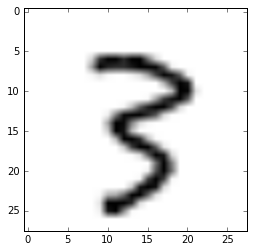

In [14]:
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
##Importing flat files containing floats
import numpy as np
file = 'datasets/mnist_kaggle_train_num.csv'
digits = np.loadtxt( file , delimiter=',')
print(np.shape(digits))
# np.shape(digits[0])
im = digits[2439,1:]
np.shape(im)
im_sq = np.reshape( im , (28,28))
# plt.pcolor(im_sq)
plt.imshow(im_sq , cmap='Greys')
plt.show()

The file imported above had no header (= row of columns names). If your file does, you can skip the 1st row as follows:

In [19]:
#if there's a header you can skip 1st row
file = 'datasets/mnist_kaggle_train.csv'
data = np.loadtxt( file , delimiter=',' , skiprows=1)
# print(data)

We can also choose particular columns with the usecols argument of np.loadtxt():

In [ ]:
#Another example of skipping rows (and choosing columns)
file = open('datasets/arrivaltext.csv')
data = np.loadtxt( file , delimiter=',' , skiprows = 1 , usecols= [1,3])
print(data)
print(np.shape(data))

### DTYPE: we can also load as a particular datatype

E.g. strings:

In [23]:
import numpy as np
file = 'datasets/seaslug.txt'
data = np.loadtxt(file, delimiter='\t' , dtype = 'str' )
print(data)

[["b'Time'" "b'Percent'"]
 ["b'99'" "b'0.067'"]
 ["b'99'" "b'0.133'"]
 ["b'99'" "b'0.067'"]
 ["b'99'" "b'0'"]
 ["b'99'" "b'0'"]
 ["b'0'" "b'0.5'"]
 ["b'0'" "b'0.467'"]
 ["b'0'" "b'0.857'"]
 ["b'0'" "b'0.5'"]
 ["b'0'" "b'0.357'"]
 ["b'0'" "b'0.533'"]
 ["b'5'" "b'0.467'"]
 ["b'5'" "b'0.467'"]
 ["b'5'" "b'0.125'"]
 ["b'5'" "b'0.4'"]
 ["b'5'" "b'0.214'"]
 ["b'5'" "b'0.4'"]
 ["b'10'" "b'0.067'"]
 ["b'10'" "b'0.067'"]
 ["b'10'" "b'0.333'"]
 ["b'10'" "b'0.333'"]
 ["b'10'" "b'0.133'"]
 ["b'10'" "b'0.133'"]
 ["b'15'" "b'0.267'"]
 ["b'15'" "b'0.286'"]
 ["b'15'" "b'0.333'"]
 ["b'15'" "b'0.214'"]
 ["b'15'" "b'0'"]
 ["b'15'" "b'0'"]
 ["b'20'" "b'0.267'"]
 ["b'20'" "b'0.2'"]
 ["b'20'" "b'0.267'"]
 ["b'20'" "b'0.437'"]
 ["b'20'" "b'0.077'"]
 ["b'20'" "b'0.067'"]
 ["b'25'" "b'0.133'"]
 ["b'25'" "b'0.267'"]
 ["b'25'" "b'0.412'"]
 ["b'25'" "b'0'"]
 ["b'25'" "b'0.067'"]
 ["b'25'" "b'0.133'"]
 ["b'30'" "b'0'"]
 ["b'30'" "b'0.071'"]
 ["b'30'" "b'0'"]
 ["b'30'" "b'0.067'"]
 ["b'30'" "b'0.067'"]
 ["b'30'" "b

and floats:

[[  9.90000000e+01   6.70000000e-02]
 [  9.90000000e+01   1.33000000e-01]
 [  9.90000000e+01   6.70000000e-02]
 [  9.90000000e+01   0.00000000e+00]
 [  9.90000000e+01   0.00000000e+00]
 [  0.00000000e+00   5.00000000e-01]
 [  0.00000000e+00   4.67000000e-01]
 [  0.00000000e+00   8.57000000e-01]
 [  0.00000000e+00   5.00000000e-01]
 [  0.00000000e+00   3.57000000e-01]
 [  0.00000000e+00   5.33000000e-01]
 [  5.00000000e+00   4.67000000e-01]
 [  5.00000000e+00   4.67000000e-01]
 [  5.00000000e+00   1.25000000e-01]
 [  5.00000000e+00   4.00000000e-01]
 [  5.00000000e+00   2.14000000e-01]
 [  5.00000000e+00   4.00000000e-01]
 [  1.00000000e+01   6.70000000e-02]
 [  1.00000000e+01   6.70000000e-02]
 [  1.00000000e+01   3.33000000e-01]
 [  1.00000000e+01   3.33000000e-01]
 [  1.00000000e+01   1.33000000e-01]
 [  1.00000000e+01   1.33000000e-01]
 [  1.50000000e+01   2.67000000e-01]
 [  1.50000000e+01   2.86000000e-01]
 [  1.50000000e+01   3.33000000e-01]
 [  1.50000000e+01   2.14000000e-01]
 

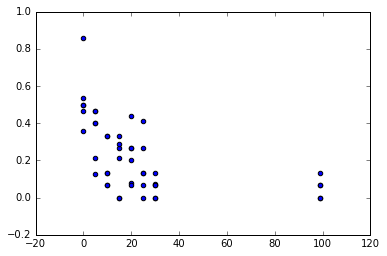

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
file = 'datasets/seaslug.txt'
data = np.loadtxt(file, delimiter='\t' , dtype = float , skiprows=1)
print(data)
plt.scatter(data[:,0] , data[:,1])
plt.show()

The problem here is no mixed datatypes. We can, however, import files of mixed datatypes with np.genfromtxt by setting the argument dtype = None:

In [5]:
file = 'datasets/titanic_sub.csv'
data = np.genfromtxt( file , delimiter=','  , names = True , dtype = None ) #also see skip_header = 1
# type(data[0])
print(type(data))
print(data[0])
print(type(data[0]))
print(type(data[0][1]))
print(type(data[0][3]))

<class 'numpy.ndarray'>
(1, 0, 3, b'male', 22.0, 1, 0, b'A/5 21171', 7.25, b'', b'S')
<class 'numpy.void'>
<class 'numpy.int64'>
<class 'numpy.bytes_'>


check out all of these datatypes above in one array! :-)

Note: the function np.recfromcsv is similar to np.genfromtxt() but the default dtype is dtype = None:

In [28]:
#also see recfromcsv
d = np.recfromcsv(file)
print(d[:10])

[(1, 0, 3, b'male', 22.0, 1, 0, b'A/5 21171', 7.25, b'', b'S')
 (2, 1, 1, b'female', 38.0, 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26.0, 0, 0, b'STON/O2. 3101282', 7.925, b'', b'S')
 (4, 1, 1, b'female', 35.0, 1, 0, b'113803', 53.1, b'C123', b'S')
 (5, 0, 3, b'male', 35.0, 0, 0, b'373450', 8.05, b'', b'S')
 (6, 0, 3, b'male', nan, 0, 0, b'330877', 8.4583, b'', b'Q')
 (7, 0, 1, b'male', 54.0, 0, 0, b'17463', 51.8625, b'E46', b'S')
 (8, 0, 3, b'male', 2.0, 3, 1, b'349909', 21.075, b'', b'S')
 (9, 1, 3, b'female', 27.0, 0, 2, b'347742', 11.1333, b'', b'S')
 (10, 1, 2, b'female', 14.0, 1, 0, b'237736', 30.0708, b'', b'C')]


You can actually do all of this a lot more simply using Pandas, which follows here now:

### PANDAS

Import data using pandas:

In [7]:
import pandas as pd
file = 'datasets/mnist_kaggle_train_num.csv'
data = pd.read_csv(file , nrows = 5 , header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What type of object is this?

In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


It's a motherfucking dataframe! But we can also quickly retrieve a numpy array  from it if necessary, using the method 'values':

In [9]:
print(type(data.values))
print(np.shape(data.values))

<class 'numpy.ndarray'>
(5, 785)


Having a header is the default:

In [12]:
import pandas as pd
file = 'datasets/titanic_sub.csv'
data = pd.read_csv(file )
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Getting specific columns is really easy:

In [13]:
I = [0,1,3,9]
data[I].head()

,PassengerId,Survived,Sex,Cabin
0,1,0,male,NaN
1,2,1,female,C85
2,3,1,female,NaN
3,4,1,female,C123
4,5,0,male,NaN


As is getting specific rows:

In [14]:
data.ix[I]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C


We can also use pandas to plot histograms of numerical columns very easily:

/Users/hugobowne/repos/p3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


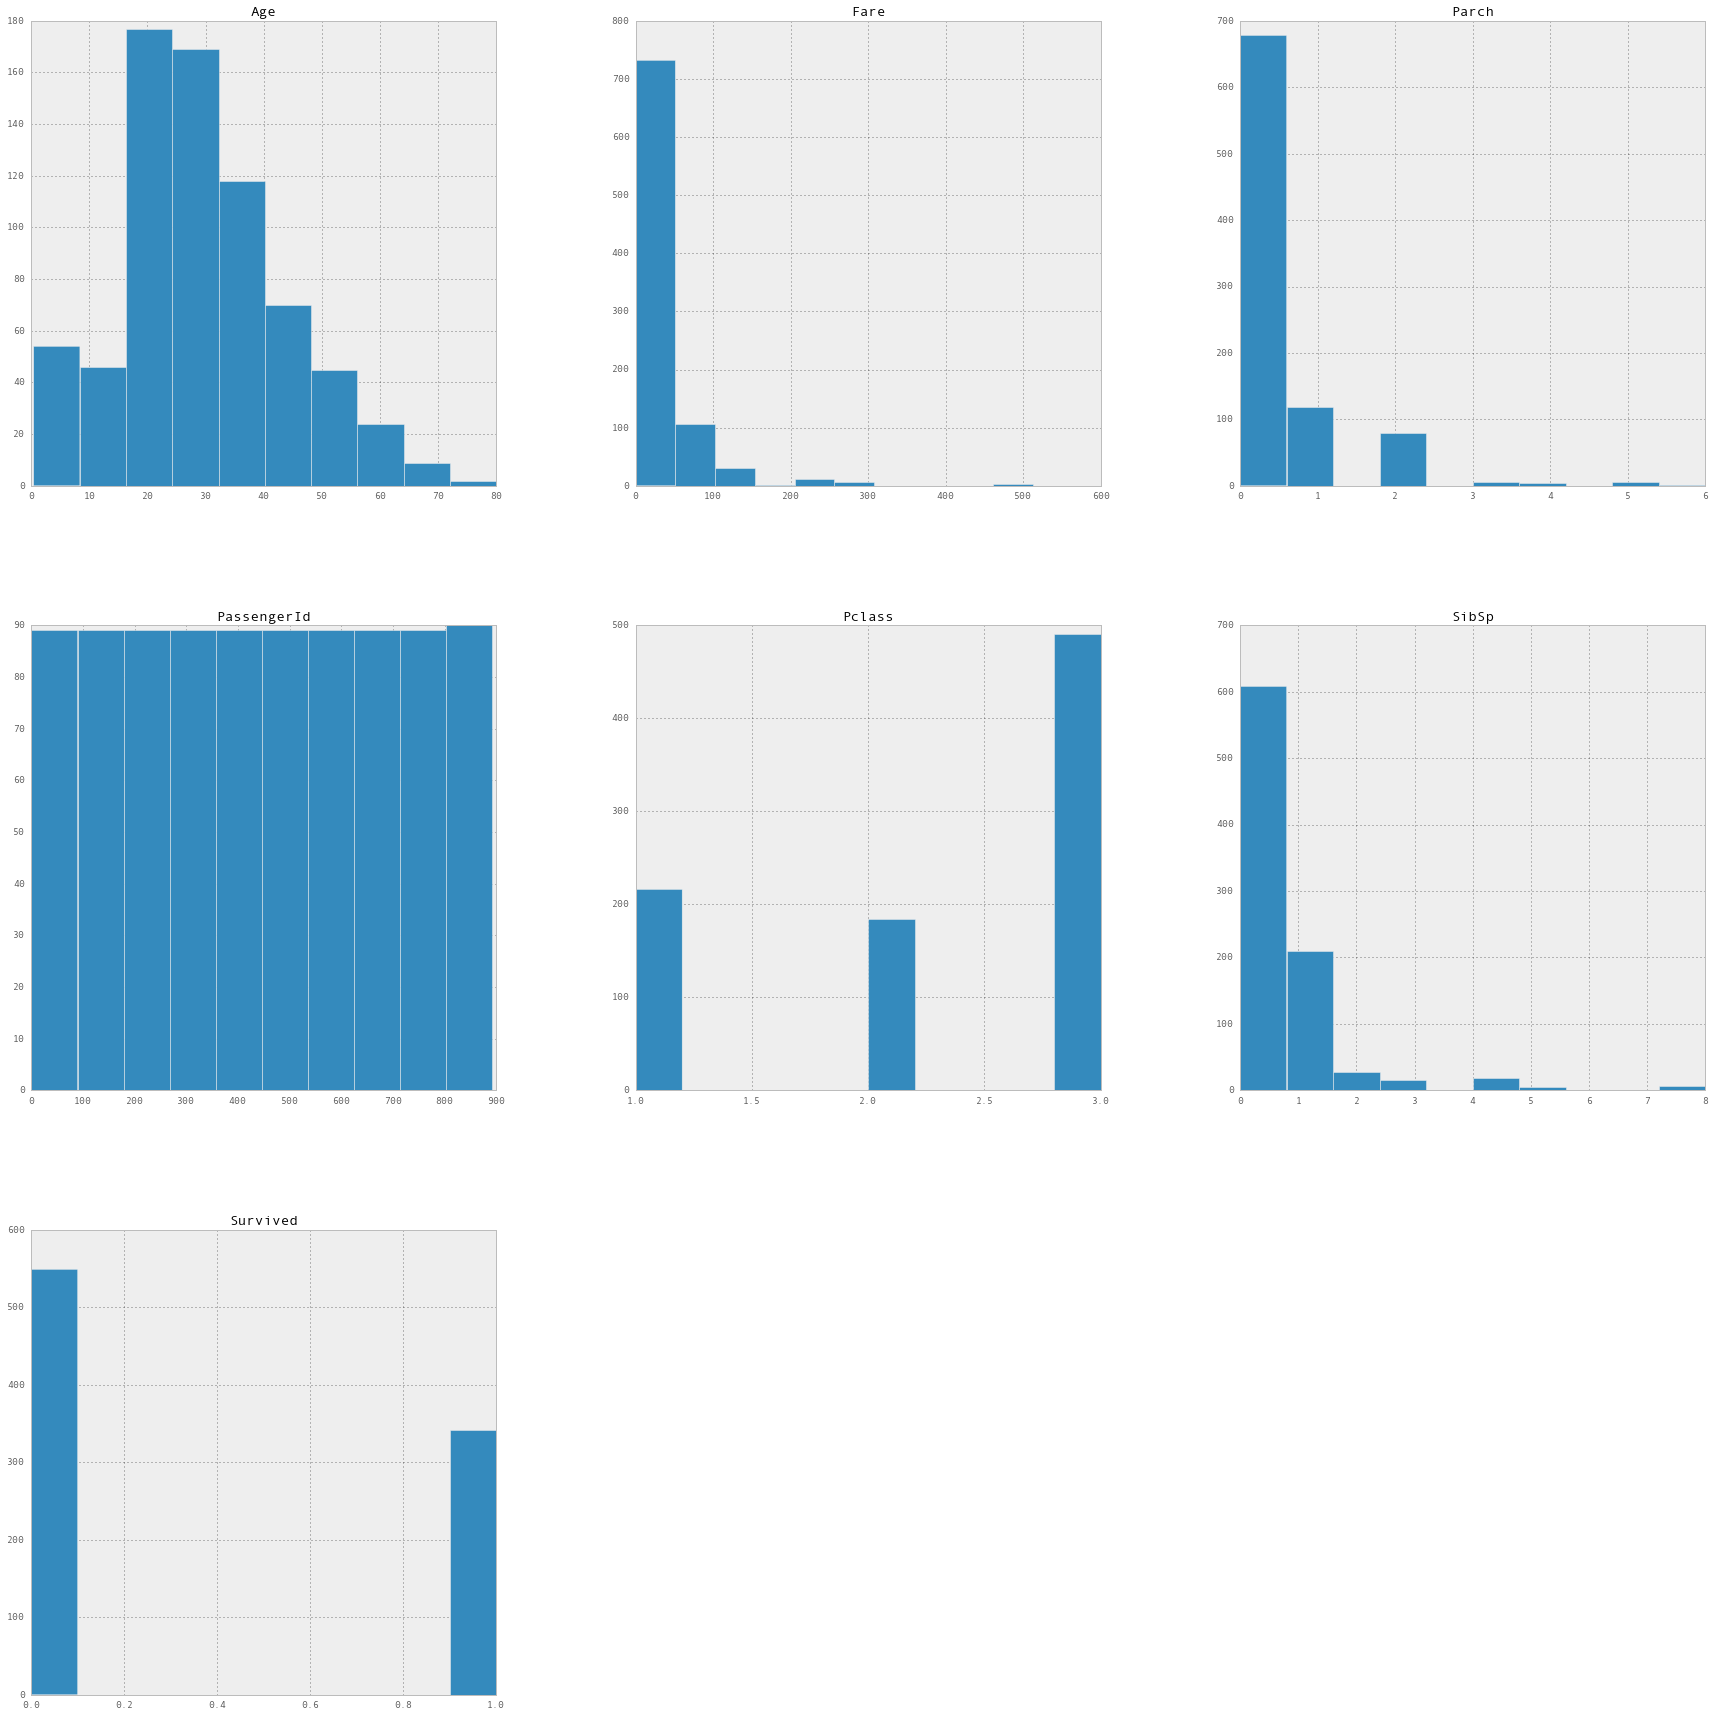

In [17]:
file = 'datasets/titanic_sub.csv'
data = pd.read_csv(file )
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
pd.DataFrame.hist(data , figsize=[30,30]);

For more on Pandas dataframes, check out DataCamp's Intermeditate Python course (if you haven't already) and keep your eyes open for our upcoming Introduction to Pandas course!